### 0. Set up the env
Predict whether patients have heart disease based on patient information.
Steps：
1. Definite problem
2. Data
3. Evaluate
4. Features
5. Model
6. Experimentation

Column Descriptions:
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol  (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by fluoroscopy
* thal : [normal; fixed defect; reversible defect]
* num: the predicted attribute


* id（每个患者的唯一 ID）
* 年龄（患者的年龄，以岁为单位）
* 出身地（学习地点）
* 性别（男/女）
* CP 胸痛类型（[典型心绞痛、非典型心绞痛、非心绞痛、无症状]）
* trestbps 静息血压（静息血压（入院时以毫米汞柱为单位））
* chol（血清胆固醇，单位为 mg/dl）
* FBS（如果空腹血糖 > 120 mg/dl）
* restecg（静息心电图结果）
  -- 数值：[正常、stt 异常、lv 肥大]
* thalach：达到的最大心率
* exang：运动诱发的心绞痛（正确/错误）
* oldpeak：运动相对于休息引起的 ST 压低
* 斜率：运动峰值 ST 段的斜率
* ca : 通过透视着色的主要血管数量 (0-3)
* 塔尔：[正常； 修复缺陷； 可逆缺陷]
* num：预测的属性

In [8]:
# !pip install seaborn

In [1]:
# import the tool packages
# Regular EDA (exploratory data analysis) and plotting libraries.
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Models Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### 1. Get data ready

In [2]:
# import data from data folder
df = pd.read_csv('../mlztm/data/heart-disease.csv')

# check data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Data Exploration, these are important!!
1. what problems do you want to solve
2. what kind of data do I have, and how should I treat different types
3. what's missing from the data,and how should I deal with them
4. what are the outliers and why should I care about it
5. how can I add, change, remove datas to get more from data

In [6]:
# find out how many classes there are
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Balanced classification!

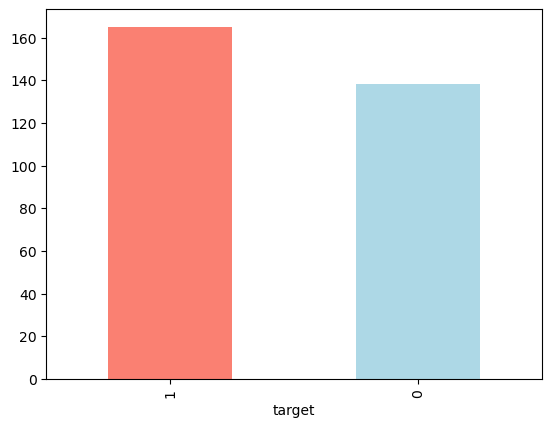

In [7]:
# show the data
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [9]:
# are there any missing data?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# other data infomations
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### crosstab交叉表
* 研究两个变量之间相互关系的统计工具

In [11]:
# Heart disease frequency according sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


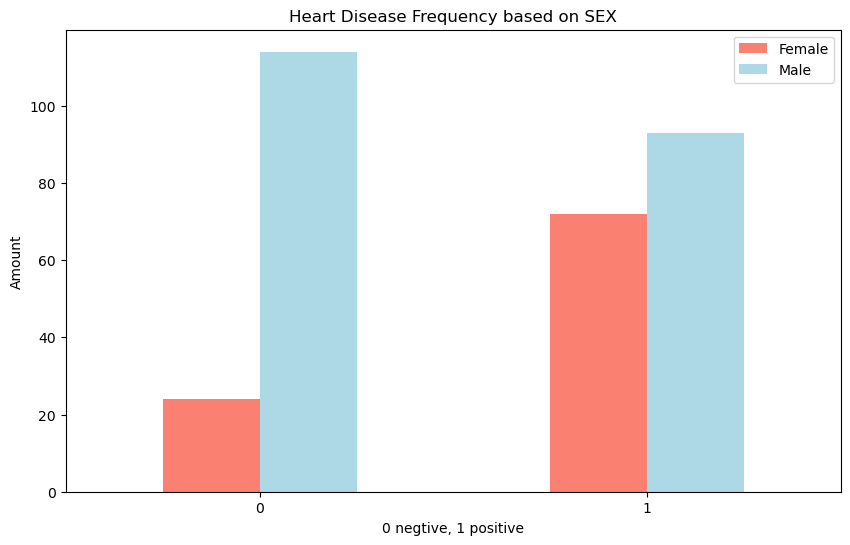

In [12]:
# Make the crosstab more visual
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency based on SEX")
plt.xlabel("0 negtive, 1 positive")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age with max heart rate (thalach) for targe

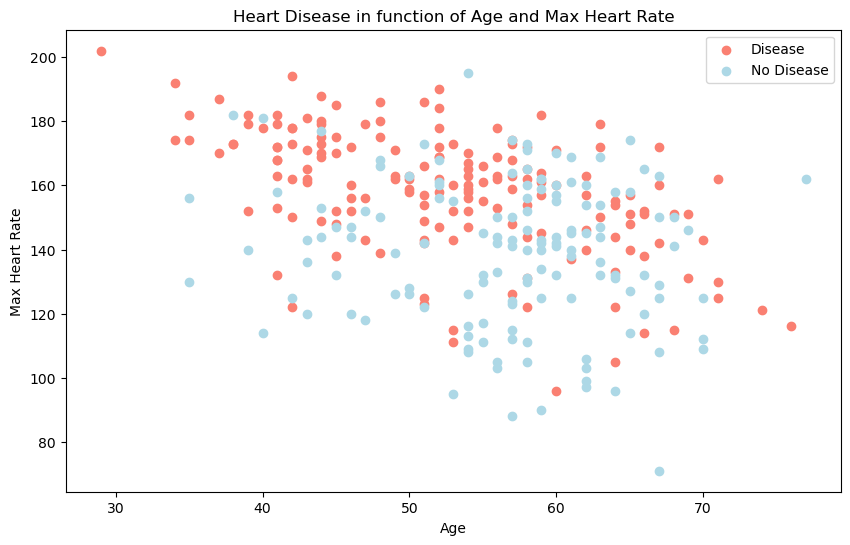

In [13]:
# visual by figure
plt.figure(figsize = (10, 6))

# 观察，positive的target中，age和thalach的关系
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

memo: 同样是阳性的患者中，他们的年龄和心率是负相关的，这符合常识

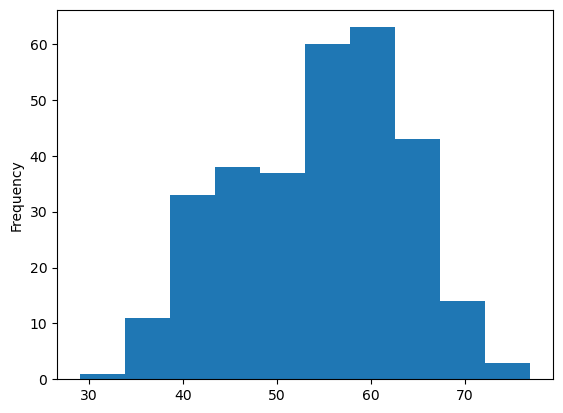

In [14]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

In [15]:
# check CP with target
# cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


memo: 疼痛只有2的比1的还多，疼痛为0级别（最高）的人反而为阴性的多，有时候需要专业人员的建议和解释。

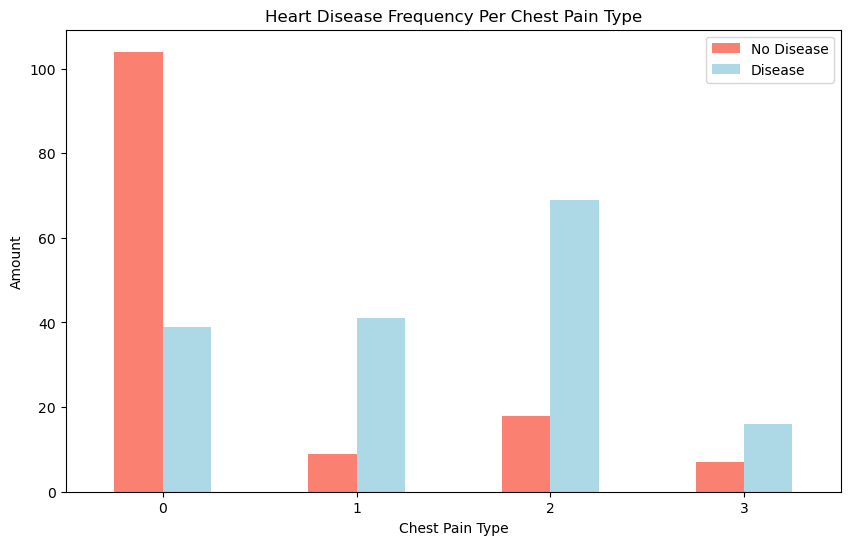

In [16]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [17]:
# create a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

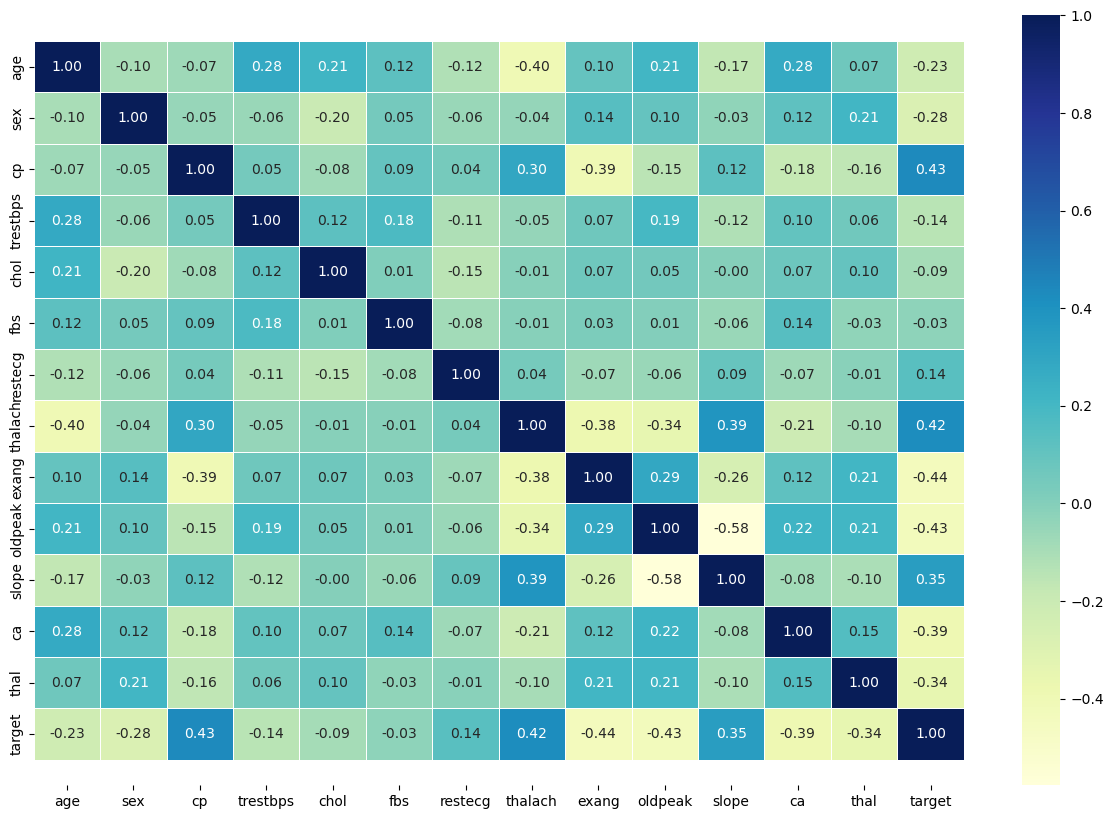

In [18]:
# Visual the matrix with seaborn
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
# 使用热图（heatmap）可视化相关性矩阵
ax = sns.heatmap(corr_matrix,
                 annot=True,          # 在热图上显示数值标签
                 linewidths=0.5,      # 设置格子之间的分割线宽度
                 fmt=".2f",           # 设置数值标签的格式为两位小数
                 cmap="YlGnBu")       # 设置颜色映射，这里使用黄绿蓝色调

# 调整轴的位置，防止热图的上半部分和下半部分被截断
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

EDA is very important for understand data,
choose the right feature for training.

### 3. Modeling

In [3]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]
# see if right

In [4]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3


可以观察到：数据集分出了242行作为训练数据集，同时次序是被打乱的。
使用三种方法进行训练
* 逻辑回归
* KNN
* 随机森林

In [22]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [23]:
# see the result
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/Users/sallyw/machine-learning-lab/mlztm/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7868852459016393,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8032786885245902}

### Model Comparision
通过各项评价指标进行比较

In [24]:
model_scores.values()

dict_values([0.7868852459016393, 0.7049180327868853, 0.8032786885245902])

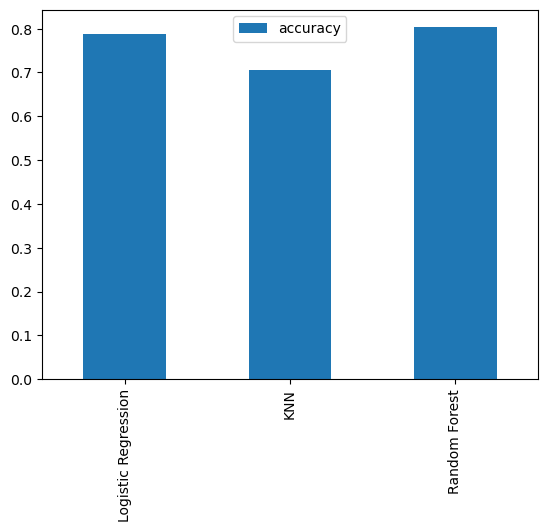

In [25]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### 4. Tuning Hyperparameters to make models better
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

#### memo
* 超参数调优
* 哪些参数是重要参数
* 混淆矩阵
* 交叉验证
* 评价指标若干

In [26]:
# Try tuning KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 73.77%


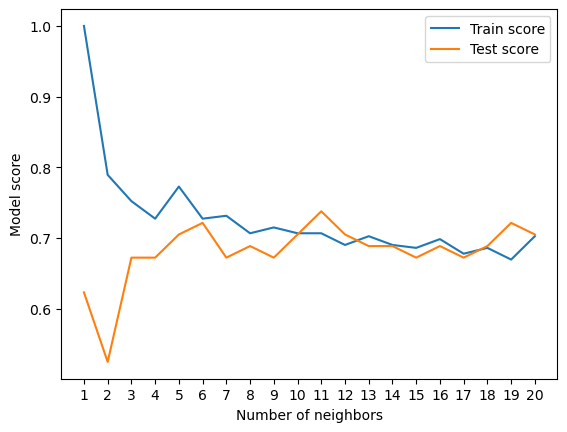

In [27]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### 笔记
KNN 算法只有一个超参数 K，即近邻的数量。K 的取值会影响 KNN 算法的性能，需要根据数据集的特点进行调优。

**K 的取值越大，则 KNN 算法越趋于平滑，对噪声更鲁棒，但也越容易欠拟合。K 的取值越小，则 KNN 算法越趋于复杂，对细节更敏感，但也越容易过拟合。**

具体来说，K 的取值可以通过以下方法进行调优：

* **交叉验证**：将数据集划分为训练集和测试集，在训练集上进行 K 的调优，然后在测试集上评估模型的性能。
* **网格搜索**：在给定的取值范围内，对 K 进行逐个尝试，选择性能最好的 K 值。
* **贝叶斯优化**：使用贝叶斯优化算法，自动搜索 K 的最佳取值。

此外，KNN 算法还可以使用加权 KNN 来提高性能。加权 KNN 算法会根据近邻的距离对其进行加权，距离越近的近邻的权重越大。加权 KNN 算法可以通过调整权重的公式来调优。

以下是一些常用的权重公式：

* 距离倒数：权重为 1/距离。
* 指数衰减：权重为 1/(距离^p)，其中 p 是一个超参数。
* 高斯核：权重为 exp(-距离^2/2σ^2)，其中 σ 是一个超参数。

在实际应用中，可以根据数据集的特点选择合适的权重公式。

KNN即使进行测试调优，在图像显示上也可以看出，不如另外两算法的表现好。

### Tuning on the other two
RandmizedSearchCV 和 GridSearchCV 都是用于在给定的超参数空间中搜索最佳超参数值的工具。它们都是 scikit-learn 库中的模块。

**RandmizedSearchCV 是随机搜索，它会从给定的超参数空间中随机选择超参数组合，然后对每个组合进行评估。**

**GridSearchCV 是网格搜索，它会遍历给定的超参数空间中的所有可能组合，然后对每个组合进行评估。**

**RandmizedSearchCV 的优点是：**

* 可以更快地找到最佳超参数值。
* 可以探索更大的超参数空间。

**RandmizedSearchCV 的缺点是：**

* 可能无法找到最优的超参数值。

**GridSearchCV 的优点是：**

* 可以保证找到最优的超参数值。

**GridSearchCV 的缺点是：**

* 可能需要花费更长的时间来找到最佳超参数值。

**RandmizedSearchCV 和 GridSearchCV 的区别主要体现在以下几个方面：**

* **搜索方式：**RandmizedSearchCV 是随机搜索，GridSearchCV 是网格搜索。
* **搜索速度：**RandmizedSearchCV 通常比 GridSearchCV 更快。
* **搜索范围：**RandmizedSearchCV 可以探索更大的超参数空间。
* **搜索保证：**GridSearchCV 可以保证找到最优的超参数值。

**在实际应用中，可以根据数据集的大小和超参数空间的大小来选择合适的搜索方法。**

**如果数据集很大，超参数空间不太大，可以使用 RandmizedSearchCV。**

**如果数据集比较小，超参数空间比较大，可以使用 GridSearchCV。**

**还可以根据需要结合使用两种方法。例如，可以先使用 RandmizedSearchCV 快速缩小超参数空间，然后使用 GridSearchCV 在缩小后的超参数空间中进行精细搜索。**

In [28]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

### hyperparameters
逻辑回归的超参数主要有以下几个：

* 正则化参数 C：正则化参数 C 用于控制模型的复杂度。C 越大，模型越复杂，越容易过拟合；C 越小，模型越简单，越容易欠拟合。
* 正则化类型：逻辑回归可以使用 L1 正则化或 L2 正则化。L1 正则化会使模型的权重变得稀疏，从而降低模型的复杂度。L2 正则化会使模型的权重变得平滑，从而降低模型的复杂度。
* 学习率：学习率用于控制模型的更新速度。学习率越大，模型更新得越快，但也越容易发生震荡；学习率越小，模型更新得越慢，但也越稳定。
* 迭代次数：迭代次数用于控制模型的训练次数。迭代次数越多，模型的性能越好，但也越容易过拟合。

在 scikit-learn 库中，逻辑回归算法的 solver 有以下几种：

* liblinear：liblinear 是使用了开源的 liblinear 库实现的 solver，内部使用了坐标轴下降法来迭代优化损失函数。liblinear 适用于小数据集。
* newton-cg：newton-cg 是拟牛顿法的一种，利用损失函数的二阶导数来迭代优化损失函数。newton-cg 适用于大数据集。
* lbfgs：lbfgs 是拟牛顿法的一种，利用损失函数的二阶近似导数来迭代优化损失函数。lbfgs 适用于大数据集。
* sag：sag 是随机平均梯度下降算法，每次迭代都会更新部分参数。sag 适用于大数据集。
* saga：saga 是随机平均梯度下降算法，可以利用损失函数的二阶近似导数来提高收敛速度。saga 适用于大数据集。
* 具体选择哪种 solver，需要根据数据集的大小和特征的类型来决定。如果数据集比较小，特征的类型比较简单，可以使用 liblinear。如果数据集比较大，特征的类型比较复杂，可以使用 newton-cg、lbfgs、sag 或 saga。

随机森林的超参数主要有以下几个：

* 树的数量：随机森林由多个决策树组成，树的数量越多，模型的性能越好，但也越容易过拟合。
* 树的深度：树的深度越深，模型的性能越好，但也越容易过拟合。
* 每个节点的最小样本数：每个节点的最小样本数越大，模型越不容易过拟合，但也越容易欠拟合。
* 最大分裂特征数：最大分裂特征数越大，模型的性能越好，但也越容易过拟合。
* 是否进行随机抽样：是否进行随机抽样可以控制模型的复杂度。如果进行随机抽样，模型的复杂度会降低，从而降低过拟合的风险。

In [30]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,  # 训练集分五份儿
                                n_iter=20,  # 迭代次数
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_  # 可以检查最好的参数组合， 发现和原本的结果是一样的

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [43]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

In [35]:
# 对随机森林算法做同样的检测
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [37]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.819672131147541

memo
* 从结果来说结果优于第一次
* 但是结果来说还是逻辑回归的分数更高
* 所以下面的优化，专注于逻辑回归

### Hyperparamter Tuning with GridSearchCV

In [38]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [39]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [40]:
gs_log_reg.score(X_test, y_test)

0.8524590163934426

In [42]:
model_scores  # the first time scores, this one is higher

{'Logistic Regression': 0.7868852459016393,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8032786885245902}

In [44]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

In [45]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

* 两种方法都结果一样，但是参数不一样
* 优于第一次的结果

### 5. Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [46]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

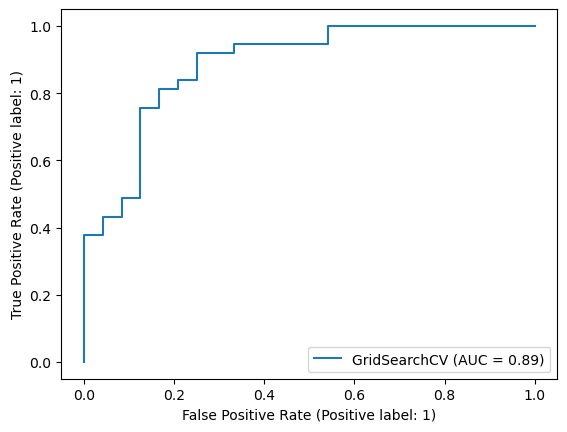

In [49]:
# Scikit-Learn 1.2.0 or later
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 

### ROC（Receiver Operating Characteristic）曲线是用于评估二分类模型性能的一种工具。
ROC 曲线的横轴和纵轴分别是以下两个指标：

1. **横轴（X 轴）：** 假正例率（False Positive Rate，FPR）
   - 横轴表示模型错误地将负例预测为正例的比例。计算方式为 \(FPR = \frac{FP}{FP + TN}\)，其中 \(FP\) 是假正例数，\(TN\) 是真负例数。

2. **纵轴（Y 轴）：** 真正例率（True Positive Rate，TPR），也称为灵敏度（Sensitivity）或召回率（Recall）
   - 纵轴表示模型正确地将正例预测为正例的比例。计算方式为 \(TPR = \frac{TP}{TP + FN}\)，其中 \(TP\) 是真正例数，\(FN\) 是假负例数。

ROC 曲线以 FPR 为横轴，TPR 为纵轴，是一个以（0,0）为起点，（1,1）为终点的曲线。ROC 曲线的形状越靠拢左上角，说明模型性能越好。

在 ROC 曲线中，对角线（45度线）代表随机猜测的性能。模型的 ROC 曲线越远离对角线向左上方弯曲，说明模型在不同阈值下都能取得更好的性能。ROC 曲线下方的面积称为 AUC（Area Under the Curve），AUC 值越大，说明模型性能越好。

In [50]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[18  6]
 [ 3 34]]


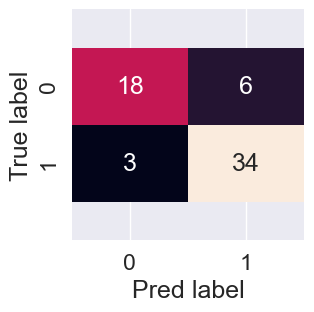

In [52]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Pred label")
    plt.ylabel("True label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [53]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.85      0.92      0.88        37

    accuracy                           0.85        61
   macro avg       0.85      0.83      0.84        61
weighted avg       0.85      0.85      0.85        61



### 报告的解释
* Precision（精确度）： 预测为正例中实际为正例的比例。在报告中，"0" 类的精确度为 0.86，"1" 类的精确度为 0.85。
关注错报
* Recall（召回率）： 实际为正例中被预测为正例的比例。在报告中，"0" 类的召回率为 0.75，"1" 类的召回率为 0.92。
关注漏报
* F1-Score： 精确度和召回率的调和平均值。在报告中，"0" 类的 F1-Score 为 0.80，"1" 类的 F1-Score 为 0.88。
二者的平均
* Support： 每个类别的样本数量。

* Accuracy（准确度）： 分类器在所有类别上正确分类的比例。在报告中，准确度为 0.85。

* Macro Avg（宏平均）和 Weighted Avg（加权平均）： 分别是各个类别指标的算术平均和按照各个类别样本数加权的平均。

### 交叉验证 Calculate evaluation metrics using cross-validation

calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [54]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [55]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.1082636733874054,
                         solver="liblinear")

In [57]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.834808743169399

In [58]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8182683982683983

In [59]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9030303030303031

In [60]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8572876223964057

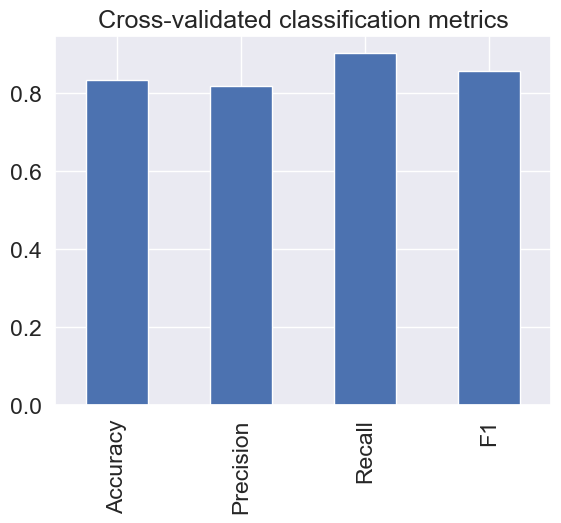

In [61]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Important Features

In [5]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [6]:
# Check coef_
clf.coef_

array([[ 0.00127778, -0.73715358,  0.74642875, -0.00794084, -0.00183444,
         0.21116745,  0.35457846,  0.02323743, -0.59859864, -0.46740914,
         0.48734036, -0.58539926, -0.83334652]])

#### coef
* "Coef" 通常是 "coefficient"（系数）的缩写。在数学、物理、统计学等领域，系数通常指的是某个变量前面的乘数。
* 系数可以用于表示方程中的各个项之间的关系，或者表示统计模型中变量的权重。

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0012777825353327912,
 'sex': -0.7371535782477894,
 'cp': 0.7464287463031366,
 'trestbps': -0.007940840601457184,
 'chol': -0.001834439765709447,
 'fbs': 0.2111674541412432,
 'restecg': 0.3545784563743296,
 'thalach': 0.023237433026959207,
 'exang': -0.5985986400061988,
 'oldpeak': -0.4674091352653281,
 'slope': 0.4873403639759379,
 'ca': -0.5853992556015996,
 'thal': -0.8333465196750065}

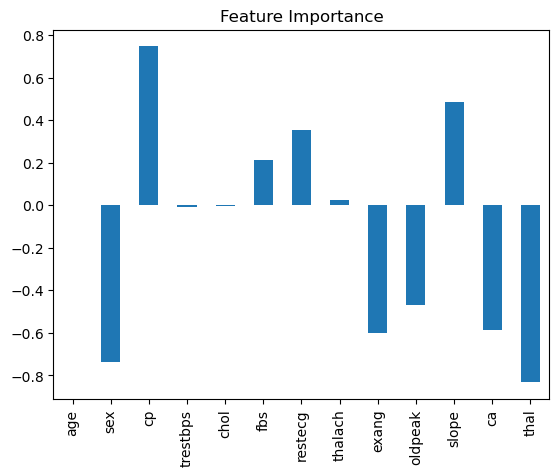

In [9]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [10]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [11]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?